In [3]:
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
x = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
print(x.shape, y.shape)
print(x[:5])
print(y[:5])

(17000, 8) (17000,)
[[-1.1431e+02  3.4190e+01  1.5000e+01  5.6120e+03  1.2830e+03  1.0150e+03
   4.7200e+02  1.4936e+00]
 [-1.1447e+02  3.4400e+01  1.9000e+01  7.6500e+03  1.9010e+03  1.1290e+03
   4.6300e+02  1.8200e+00]
 [-1.1456e+02  3.3690e+01  1.7000e+01  7.2000e+02  1.7400e+02  3.3300e+02
   1.1700e+02  1.6509e+00]
 [-1.1457e+02  3.3640e+01  1.4000e+01  1.5010e+03  3.3700e+02  5.1500e+02
   2.2600e+02  3.1917e+00]
 [-1.1457e+02  3.3570e+01  2.0000e+01  1.4540e+03  3.2600e+02  6.2400e+02
   2.6200e+02  1.9250e+00]]
[66900. 80100. 85700. 73400. 65500.]


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

print('w:', model.coef_)
print('b:', model.intercept_)


w: [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04]
b: -3620600.8929739078


In [6]:
import pickle

with open('HousePriceLR.pk', 'wb') as fs:
 pickle.dump(model, fs)


In [8]:
model = pickle.load(open('HousePriceLR.pk', 'rb'))
print(x[:1])
print(model.predict(x[:1]))
print(y[0])


[[-1.1431e+02  3.4190e+01  1.5000e+01  5.6120e+03  1.2830e+03  1.0150e+03
   4.7200e+02  1.4936e+00]]
[7128.08452517]
66900.0


In [9]:
import pandas as pd

df = pd.read_csv('sample_data/mnist_train_small.csv')
df.head()




,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
x = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0].to_numpy()
print(x.shape, y.shape)
print(x[:5])
print(y[:5])

(19999, 784) (19999,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[5 7 9 5 2]


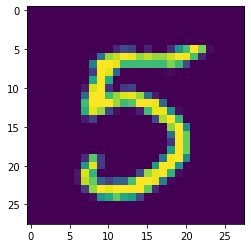

True

In [12]:
import numpy as np
import matplotlib.pyplot as plt

img = np.reshape(x[0], [28, 28])
plt.imshow(img)
plt.show()

import cv2
cv2.imwrite('a.jpg', img)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')
model.fit(x, y)

print('w:', model.coef_)
print('b:', model.intercept_)


w: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
b: [-9.98589929e-05  6.56962891e-05  4.92511220e-05 -8.15886447e-05
  1.69515643e-05  4.84344666e-04 -5.41460142e-05  1.25311924e-04
 -4.48930586e-04 -5.70313270e-05]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
import pickle

with open('DigitRecognizer.pk', 'wb') as fs:
 pickle.dump(model, fs)


In [18]:
model = pickle.load(open('DigitRecognizer.pk', 'rb'))
print(model.predict(x[:10]))
print(y[:10])


[5 7 9 5 2 0 6 5 5 1]
[5 7 9 5 2 0 6 5 5 2]


In [19]:
from sklearn.metrics import accuracy_score

y_ = model.predict(x)
accuracy = accuracy_score(y_, y)
print('accuracy:', accuracy)


accuracy: 0.9485974298714935


In [20]:
import tensorflow as tf

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [24]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(y_train[:10])
print(y_test[:10])

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


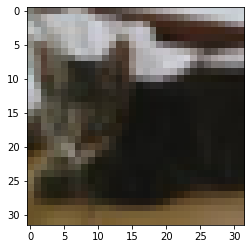

In [28]:
import matplotlib.pyplot as plt

plt.imshow(x_train[9])

In [29]:
x_train = np.reshape(x_train, [50000, 32*32*3])
y_train = y_train[:, 0]

x_test = np.reshape(x_test, [10000, 32*32*3])
y_test = y_test[:, 0]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(y_train[:10])
print(y_test[:10])

(50000, 3072) (50000,)
(10000, 3072) (10000,)
[6 9 9 4 1 1 2 7 8 3]
[3 8 8 0 6 6 1 6 3 1]


In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')
model.fit(x_train, y_train)

print('w:', model.coef_)
print('b:', model.intercept_)


w: [[ 6.03349483e-05 -1.04864950e-06  2.73378743e-04 ... -3.02406205e-05
  -1.38010222e-04 -1.39800632e-04]
 [-6.36694459e-05 -6.12374610e-05 -7.76598000e-05 ... -9.42090606e-05
  -6.91401229e-05 -9.57308041e-06]
 [-7.43359730e-06 -1.87781680e-05 -2.45186223e-04 ...  8.95858366e-05
  -8.40056186e-06 -7.00283303e-05]
 ...
 [-6.93632805e-05  7.13147949e-05  2.64295372e-04 ...  3.41477448e-04
   2.75023534e-04 -1.59826288e-04]
 [ 2.87226339e-04  1.40426824e-04  2.49465046e-04 ... -4.89505516e-04
  -4.12972032e-05  3.47870684e-04]
 [-8.51803592e-05  2.10172433e-04  4.23448362e-04 ...  4.02493317e-04
   2.09456846e-04  1.65218019e-04]]
b: [-1.22359164e-05  6.34362403e-06  3.80840360e-06  4.58821880e-06
  4.44879255e-06 -4.10884830e-06  6.66548533e-06  1.08485530e-06
 -1.10699962e-05  4.75381356e-07]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
from sklearn.metrics import accuracy_score

def compute_accuracy(model, x, y):
  y_ = model.predict(x)
  return accuracy_score(y_, y)

print(compute_accuracy(model, x_train, y_train))
print(compute_accuracy(model, x_test, y_test))

0.4258
0.4024
